In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
uniprot_df = pd.read_table('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/uniprotkb_proteome_UP000005640_AND_revi_2023_10_05.tsv', sep='\t')
uniprot_df = uniprot_df[['STRING', 'Entry']]
uniprot_df.dropna(subset=['STRING'], inplace=True)
uniprot_df['STRING'] = uniprot_df['STRING'].str.replace(';', '')
uniprot_df

,STRING,Entry
2,9606.ENSP00000482829,A0A0B4J2F2
7,9606.ENSP00000377112,A0AV02
8,9606.ENSP00000371212,A0AV96
9,9606.ENSP00000419279,A0AVF1
10,9606.ENSP00000372394,A0AVI4
...,...,...
20371,9606.ENSP00000429608,Q96PS1
20373,9606.ENSP00000402355,Q96T59
20383,9606.ENSP00000359558,Q9H1L0
20388,9606.ENSP00000455079,Q9H693


In [3]:
string_df = pd.read_table('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0.txt', sep=' ')
string_df

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,173
1,9606.ENSP00000000233,9606.ENSP00000427567,154
2,9606.ENSP00000000233,9606.ENSP00000253413,151
3,9606.ENSP00000000233,9606.ENSP00000493357,471
4,9606.ENSP00000000233,9606.ENSP00000324127,201
...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,169


In [4]:
def get_values_from_dict(keys, dictionary, na_rm=True):
    # Ensure the dictionary is a DataFrame
    dictionary = pd.DataFrame(dictionary)
    
    # Check for duplicated keys in the dictionary
    if dictionary.iloc[:, 0].duplicated().any():
        raise ValueError("Non-unique keys in dictionary: the same key can be mapped to multiple values")
    
    # Convert keys to a DataFrame
    keys_df = pd.DataFrame({'key': keys})
    
    # Join keys with the dictionary to get the corresponding values
    merged = keys_df.merge(dictionary, left_on='key', right_on=dictionary.columns[0], how='left')
    
    # Select the values column
    values = merged[dictionary.columns[1]]
    
    # If na_rm is True, remove NA values
    if na_rm:
        values = values.dropna()
    
    return values.tolist()

In [5]:
protein1 = get_values_from_dict(string_df['protein1'], uniprot_df, na_rm=False)
protein2 = get_values_from_dict(string_df['protein2'], uniprot_df, na_rm=False)
'NA' in protein1
'NA' in protein2

False

False

In [6]:
interaction_df = pd.DataFrame({'protein1': protein1, 'protein2': protein2, 'combined_score': string_df['combined_score']})
interaction_df.dropna(inplace=True)
interaction_df
interaction_df.to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0-translated.csv', index=False)

,protein1,protein2,combined_score
0,P84085,Q86X27,173
1,P84085,Q9C0D6,154
2,P84085,P36543,151
4,P84085,Q9NYI0,201
5,P84085,Q8N5M4,180
...,...,...,...
13175330,A0A096LPK9,P25098,670
13175331,A0A096LPK9,P22612,650
13175332,A0A096LPK9,P49407,679
13175333,A0A096LPK9,Q5JWF2,153


In [7]:
interaction_df['combined_score'].min()
interaction_df['combined_score'].max()

150

999

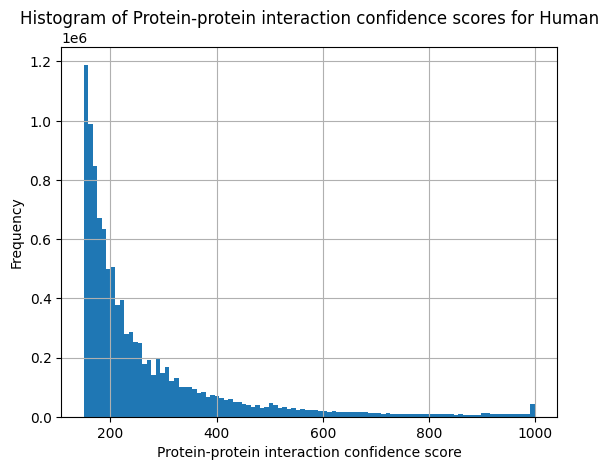

In [11]:
from matplotlib import pyplot as plt
plt.hist(interaction_df['combined_score'], bins=100)
plt.xlabel('Protein-protein interaction confidence score')
plt.ylabel('Frequency')
plt.title('Histogram of Protein-protein interaction confidence scores for Human')
plt.grid(True);

In [52]:
interaction_df = interaction_df[interaction_df['combined_score'] >= 400]
interaction_df

,protein1,protein2,combined_score
16,P84085,Q7Z4S6,513
26,P84085,Q9H0U4,648
29,P84085,Q9BXF6,501
34,P84085,Q96FN5,533
59,P84085,P20340,415
...,...,...,...
13175329,A0A096LPK9,O60262,678
13175330,A0A096LPK9,P25098,670
13175331,A0A096LPK9,P22612,650
13175332,A0A096LPK9,P49407,679


In [53]:
interaction_df.to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0-translated-filtered.csv', index=False)

400

999

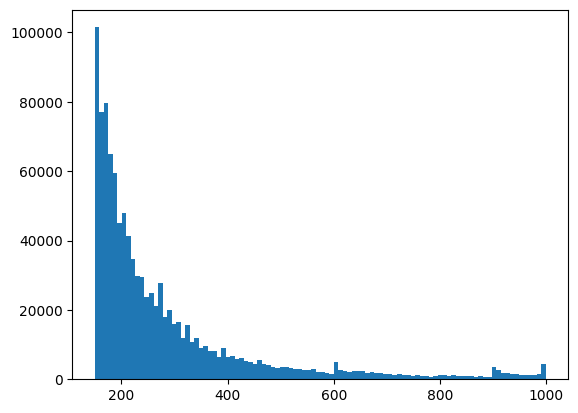

In [21]:
mask = ppi['combined_score'] >= 400

In [22]:
ppi_filtered = ppi[mask]
ppi_filtered

,protein1_acc,protein2_acc,combined_score
4,P84085,Q15057,767
34,P84085,P13987,600
90,P84085,P09874,543
93,P84085,P62820,730
97,P84085,Q6WKZ4,499
...,...,...,...
1048537,Q05209,P62993,837
1048547,Q05209,Q14511,775
1048551,Q05209,P06396,422
1048572,Q05209,O75791,485


In [8]:
ppi_filtered.to_csv('/Users/cgu3/Documents/Grape-Pi/data/single-soft-label/raw/additional/STRING-interaction-swiss-lite-filtered.csv', index=False)

In [24]:
full_links = pd.read_table('/Users/cgu3/Downloads/9606.protein.links.v12.0.txt', sep=' ')

In [26]:
full_links['combined_score'].min()

150

In [28]:
full_links.shape[0]

13715404

# Check PPI score for yeast

In [13]:
yeast_PPI = pd.read_csv('/Users/cgu3/Documents/Grape-Pi/data/yeast-ORBI/raw/interaction/yeast_interaction.csv')

<Axes: >

Text(0.5, 0, 'Protein-protein interaction confidence score')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Protein-protein interaction confidence scores for Yeast')

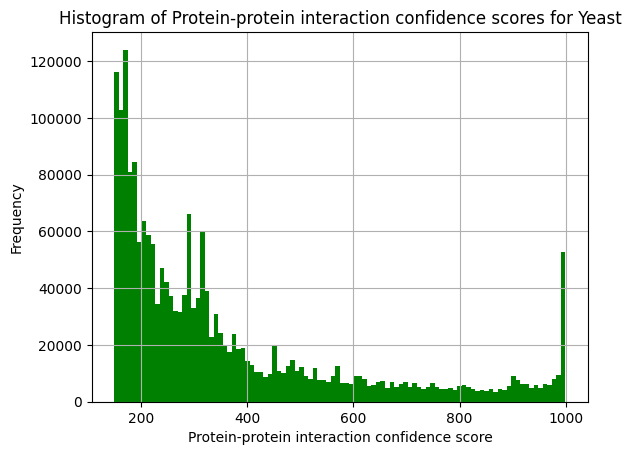

In [22]:
yeast_PPI['combined_score'].hist(bins=100, color='green')
plt.xlabel('Protein-protein interaction confidence score')
plt.ylabel('Frequency')
plt.title('Histogram of Protein-protein interaction confidence scores for Yeast')
plt.grid(True)